In [13]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

To understand the Olist dataset, we will focus on the data that are at the core of any e-commerce organisation business model. We will focus on orders, product purchased, customers and their reviews.<br>
    - The order gives us information about who buys what and when.<br>
    - The product purchased tells us what drives the revenue, it allows us to see bestselling products, poor working product, allows category level analysis and can be connected to review, returns etc.<br>
    - The customers data allows segmentation and retention analysis<br>
    - The reviews allows us to perform sentiment analysis, show satisfaction and dissatisfaction.<br>
    <br>
The **Seller** workflow ⚙

The seller:

1. joins Olist
2. uploads their product catalogues
    - (Olist) displays these catalogues to existing marketplaces (Amazon, Bahia, Walmart, ...)
3. gets notified whenever a product is sold
4. hands over the ordered items to third-party logistic carriers

*Note: Multiple sellers can be involved in one customer's order!*

The **Customer** workflow ⚙

The customer:

1. browses products on marketplaces (Amazon, Bahia, Walmart, ...)
2. purchases products listed via store
3. gets an expected date for delivery
    - *ETA = Estimated Time of Arrival (of the orders)*
4. receives the order(s)
5. leaves a review

*Note: Between 2016 and mid-2018, a review could be left as soon as the order was sent, meaning that a customer could potentially leave a review for a product they hadn't received yet!*
It is showing the whole customer journey, from browsing to placing an order, receiving the product(s) he purchased to leaving a review. 

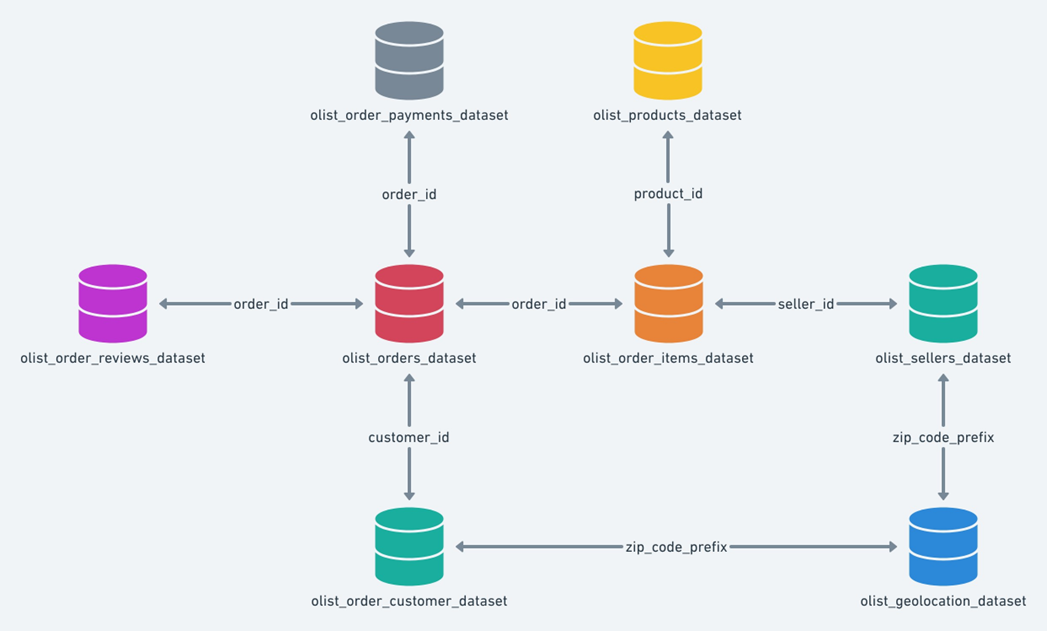

In [2]:
Image("Image/olist_erd.png")

## Objectives

**Understand which products, categories, regions they should target or avoid.** 

## Data preparation

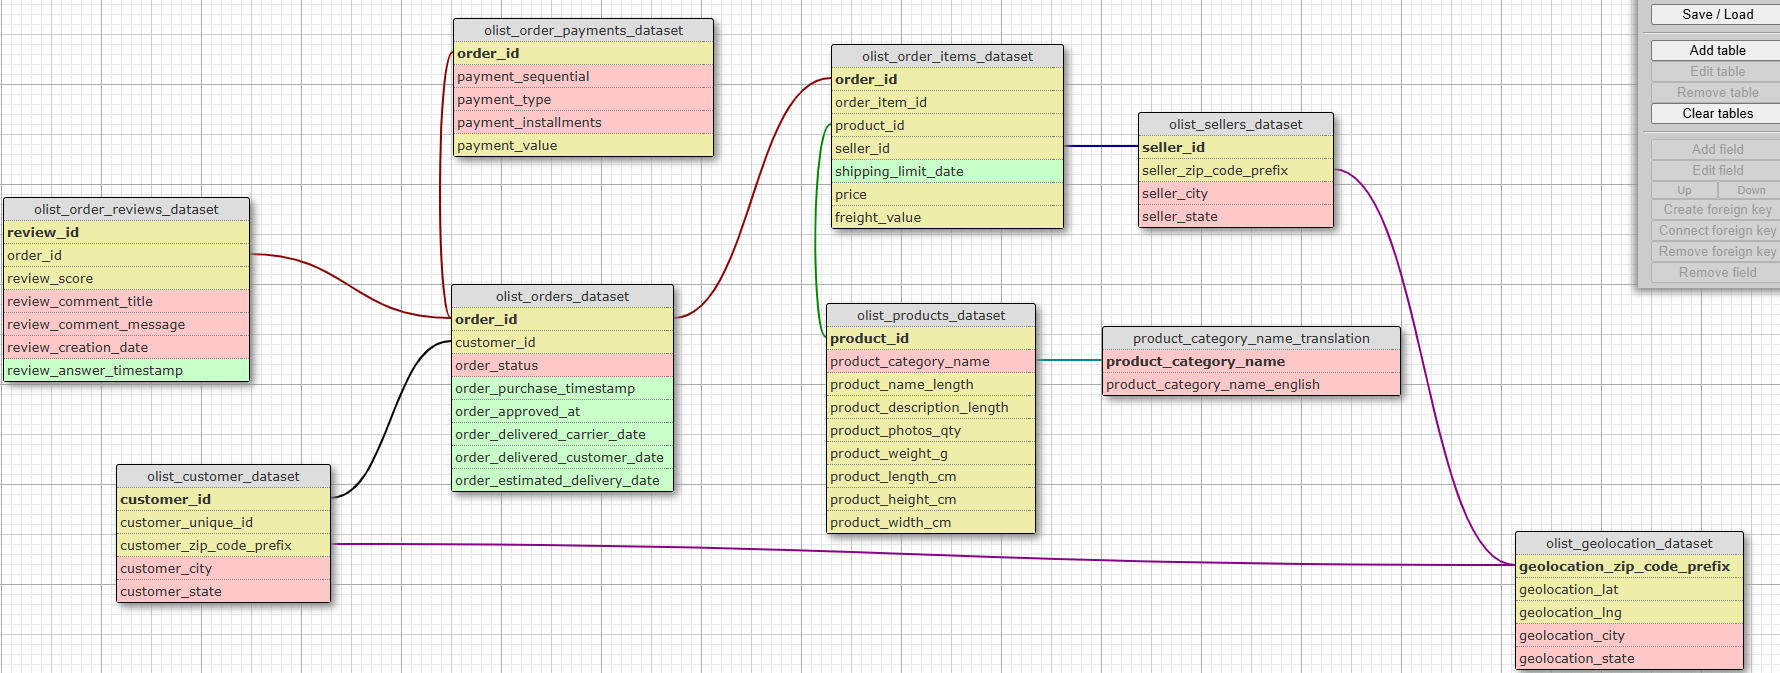

In [3]:
Image('Image/olist_erd_details.png')

In [2]:
# Load CSVs
orders = pd.read_csv('data/olist_orders_dataset.csv')
customers = pd.read_csv('data/olist_customers_dataset.csv')
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
translation = pd.read_csv('data/product_category_name_translation.csv')


In [3]:
# Merge datasets 
data = orders.merge(customers, on='customer_id', how='left') \
    .merge(order_items, on='order_id', how='left') \
    .merge(reviews, on='order_id', how='left') \
    .merge(products, on='product_id', how='left') \
    .merge(translation, on='product_category_name', how='left')
            
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e estava descrito no site e chegou bem antes da data prevista.,2017-12-03 00:00:00,2017-12-05 19:21:58,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       114092 non-null  object 
 1   customer_id                    114092 non-null  object 
 2   order_status                   114092 non-null  object 
 3   order_purchase_timestamp       114092 non-null  object 
 4   order_approved_at              113930 non-null  object 
 5   order_delivered_carrier_date   112112 non-null  object 
 6   order_delivered_customer_date  110839 non-null  object 
 7   order_estimated_delivery_date  114092 non-null  object 
 8   customer_unique_id             114092 non-null  object 
 9   customer_zip_code_prefix       114092 non-null  int64  
 10  customer_city                  114092 non-null  object 
 11  customer_state                 114092 non-null  object 
 12  order_item_id                 

In [5]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,114092.000000,113314.000000,113314.000000,113314.000000,113131.000000,111702.000000,111702.000000,111702.000000,113296.000000,113296.000000,113296.000000,113296.000000
mean,35105.227308,1.198528,120.478701,19.979428,4.016998,48.777560,786.899250,2.206908,2091.915037,30.162495,16.584513,23.003539
std,29868.300916,0.707016,183.279678,15.783227,1.400074,10.024616,651.758866,1.719500,3749.804597,16.151737,13.439206,11.708481
min,1003.000000,1.000000,0.850000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11250.000000,1.000000,39.900000,13.080000,4.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24320.000000,1.000000,74.900000,16.260000,5.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,59022.000000,1.000000,134.900000,21.150000,5.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99990.000000,21.000000,6735.000000,409.680000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [6]:
data.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   162
order_delivered_carrier_date       1980
order_delivered_customer_date      3253
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                       778
product_id                          778
seller_id                           778
shipping_limit_date                 778
price                               778
freight_value                       778
review_id                           961
review_score                        961
review_comment_title             100569
review_comment_message            65926
review_creation_date                961
review_answer_timestamp             961
product_category_name              2390


In [7]:
# transform the date related data to the right format
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'])
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])

In [8]:
# To enhance the understanding of customers satisfaction, we calculate if deliveries were late or early
data["order_reception_delay"] = data["order_estimated_delivery_date"] - data["order_delivered_customer_date"]

In [9]:
# Cleaning
# Drop columns not inherently related to the objectives, especially in the context of EDA
# drop columns with too many missing values

data = data.drop(columns=['order_delivered_carrier_date','order_approved_at', 'review_id','review_comment_title', 
                         'review_comment_message', 'product_name_lenght', 'product_description_lenght',
                         'product_photos_qty','product_weight_g', 'product_length_cm', 'product_height_cm','product_width_cm',
                         'product_category_name', 'customer_id'])

In [10]:
data.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name_english', 'order_reception_delay'],
      dtype='object')

## Categories_Exploration

In [120]:
data['product_category_name_english'].nunique()

71

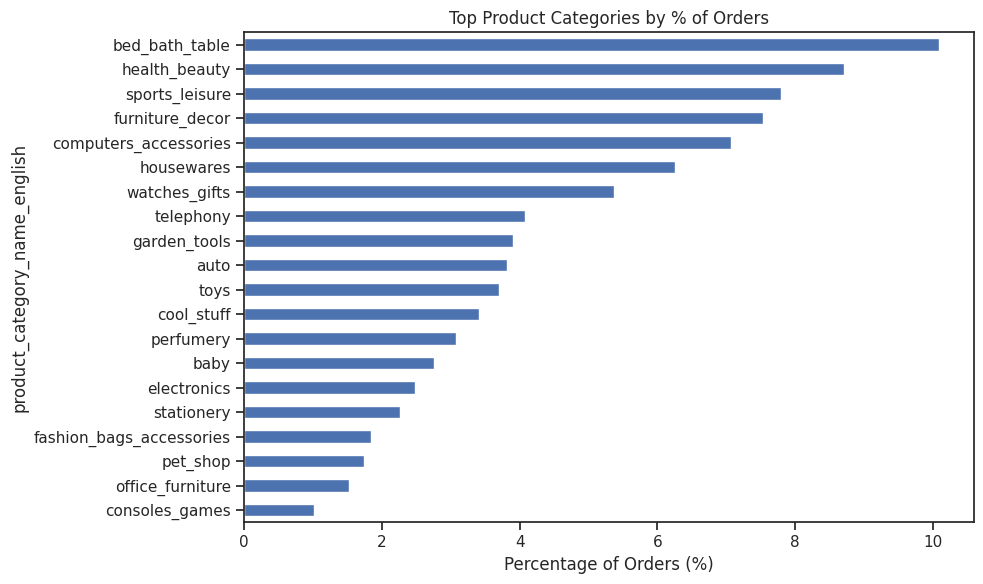

In [47]:
category_distribution = data['product_category_name_english'].value_counts(normalize=True, dropna=True) * 100


plt.figure(figsize=(10, 6))
category_distribution.head(20).sort_values().plot(kind='barh')
plt.xlabel('Percentage of Orders (%)')
plt.title('Top Product Categories by % of Orders')
plt.tight_layout()
plt.show()

We can see here the categories that are the most sold, but are they the ones that brings in the most revenue?

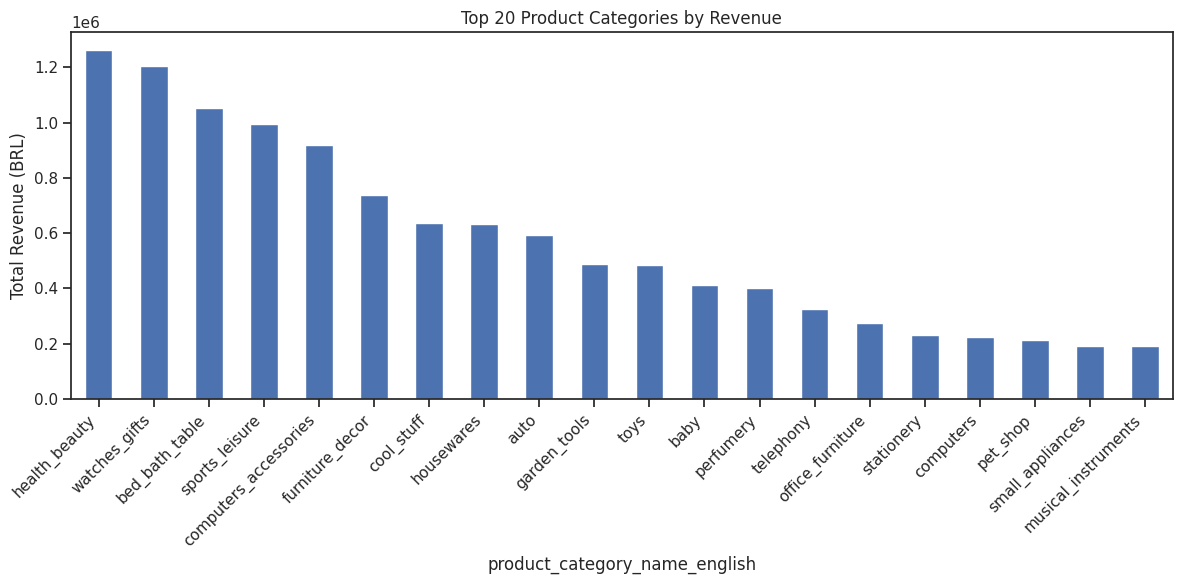

In [51]:
# Drop rows with missing prices or categories
filtered_data = data[['product_category_name_english', 'price']].dropna()

# Group by category and sum the revenue
revenue_by_category = filtered_data.groupby('product_category_name_english')['price'].sum()
revenue_by_category = revenue_by_category.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_category.head(20).plot(kind='bar')
plt.ylabel('Total Revenue (BRL)')
plt.title('Top 20 Product Categories by Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We have 2 important informative plots<br>
        - Sales Volume (%) per Category (from value_counts(normalize=True))<br>
        - Total Revenue (BRL) per Category (from groupby('category')['price'].sum())<br>

Let's visualize the comparison of sales percentage vs revenue with a heatmap! (And add the average price per category)

In [113]:
top_categories = category_distribution.index

# Filter & align both metrics
sales_pct = category_distribution[top_categories]
revenue = revenue_by_category[top_categories]

# Add average price
avg_price = data.groupby('product_category_name_english')['price'].mean()

heatmap_df = pd.DataFrame({
    'Sales %': sales_pct,
    'Revenue (BRL)': revenue,
    'Avg Price (BRL)': avg_price[top_categories]
})

In [123]:
# Sort the heatmap by revenue
heatmap_df = heatmap_df.sort_values(by='Revenue (BRL)', ascending=False)

# Add cumulative Sales %
heatmap_df['Cumulative Sales %'] = heatmap_df['Sales %'].cumsum()

#Find the index (row) where cumulative sales exceed 95%
cutoff_index = heatmap_df['Cumulative Sales %'].searchsorted(95)

# We normalize so that all metrics are comparable on the same color scale for the heatmap(only!!)
normalized_df = (heatmap_df - heatmap_df.min()) / (heatmap_df.max() - heatmap_df.min())

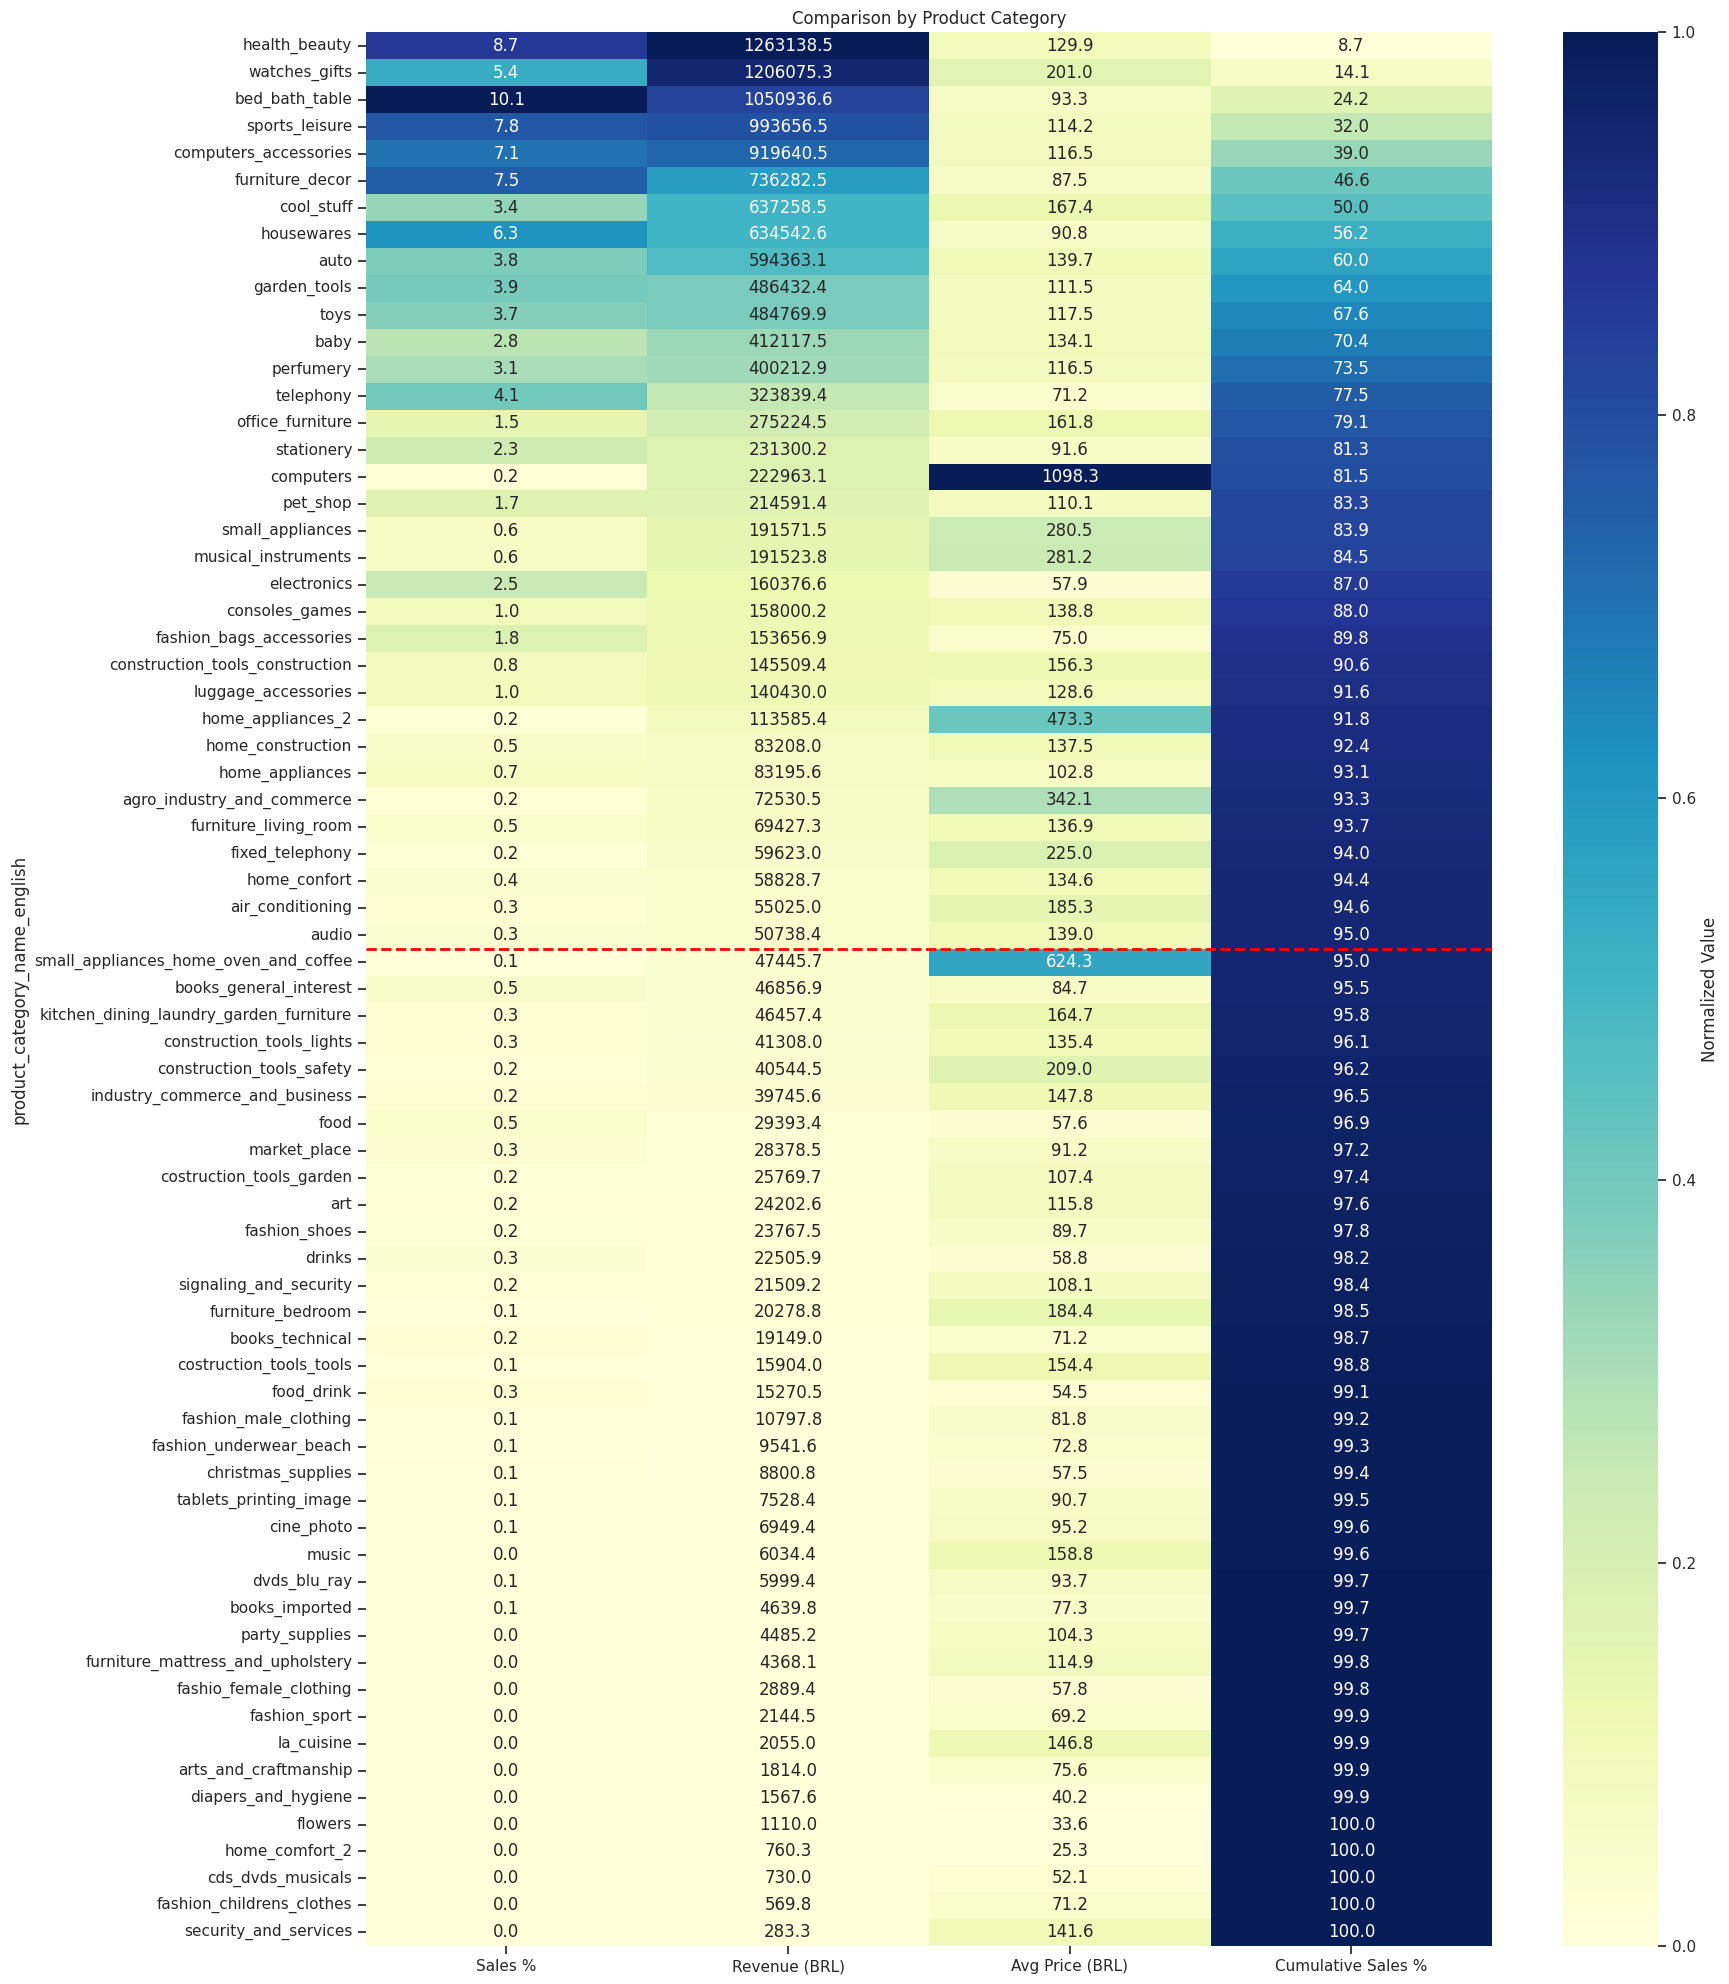

In [124]:
plt.figure(figsize=(18, 20))
sns.heatmap(
    normalized_df,
    annot=heatmap_df.round(1),
    fmt='',
    cmap='YlGnBu',
    cbar_kws={'label': 'Normalized Value'}
)
plt.axhline(cutoff_index, color='red', linewidth=2, linestyle='--')
plt.title('Comparison by Product Category')
plt.tight_layout()
plt.show()

The color intensity tells you how high or low that metric is compared to others.
The annotations show actual values for clarity.

We can observe that out of the 71 categories, 95% of the revenue is made by:

In [127]:
print(f" {cutoff_index + 1} categories only!")

 35 categories only!


## Regions_Exploration

In [128]:
data['customer_state'].nunique()

27

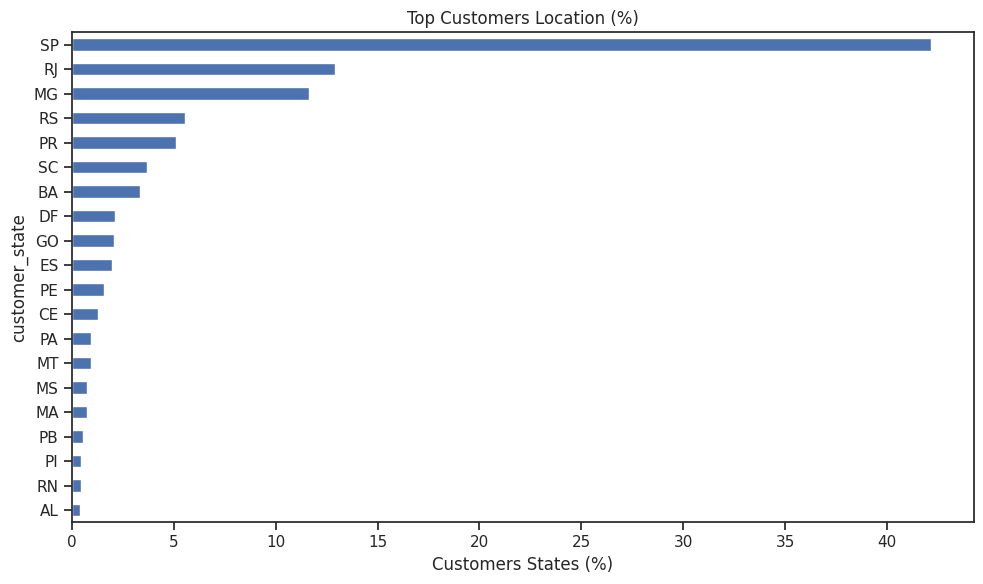

In [131]:
customers_distribution = data['customer_state'].value_counts(normalize=True, dropna=True) * 100


plt.figure(figsize=(10, 6))
customers_distribution.head(20).sort_values().plot(kind='barh')
plt.xlabel('Customers States (%)')
plt.title('Top Customers Location (%)')
plt.tight_layout()
plt.show()

It would be interesting to see if the reviews score is correlated to states, as well as the delay, it could show a distribution problem that has to be fixed.

In [ ]:
# Drop rows with missing prices or categories
filtered_data = data[['product_category_name_english', 'price']].dropna()

# Group by category and sum the revenue
revenue_by_category = filtered_data.groupby('product_category_name_english')['price'].sum()
revenue_by_category = revenue_by_category.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
revenue_by_category.head(20).plot(kind='bar')
plt.ylabel('Total Revenue (BRL)')
plt.title('Top 20 Product Categories by Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
top_categories = category_distribution.index

# Filter & align both metrics
sales_pct = category_distribution[top_categories]
revenue = revenue_by_category[top_categories]

# Add average price
avg_price = data.groupby('product_category_name_english')['price'].mean()

heatmap_df = pd.DataFrame({
    'Sales %': sales_pct,
    'Revenue (BRL)': revenue,
    'Avg Price (BRL)': avg_price[top_categories]
})

In [148]:
# Drop rows with missing prices or categories
filtered_data_loc = data[['review_score', 'customer_state', 'order_reception_delay']].dropna()

# Group reviews and delay by states
states_review_score = filtered_data_loc.groupby('customer_state')['review_score'].mean().sort_values(ascending=False)
states_delay = filtered_data_loc.groupby('customer_state')['order_reception_delay'].median().sort_values(ascending=False)

Once Again, we'll use a heatmap to show the relationship between these 3 information.

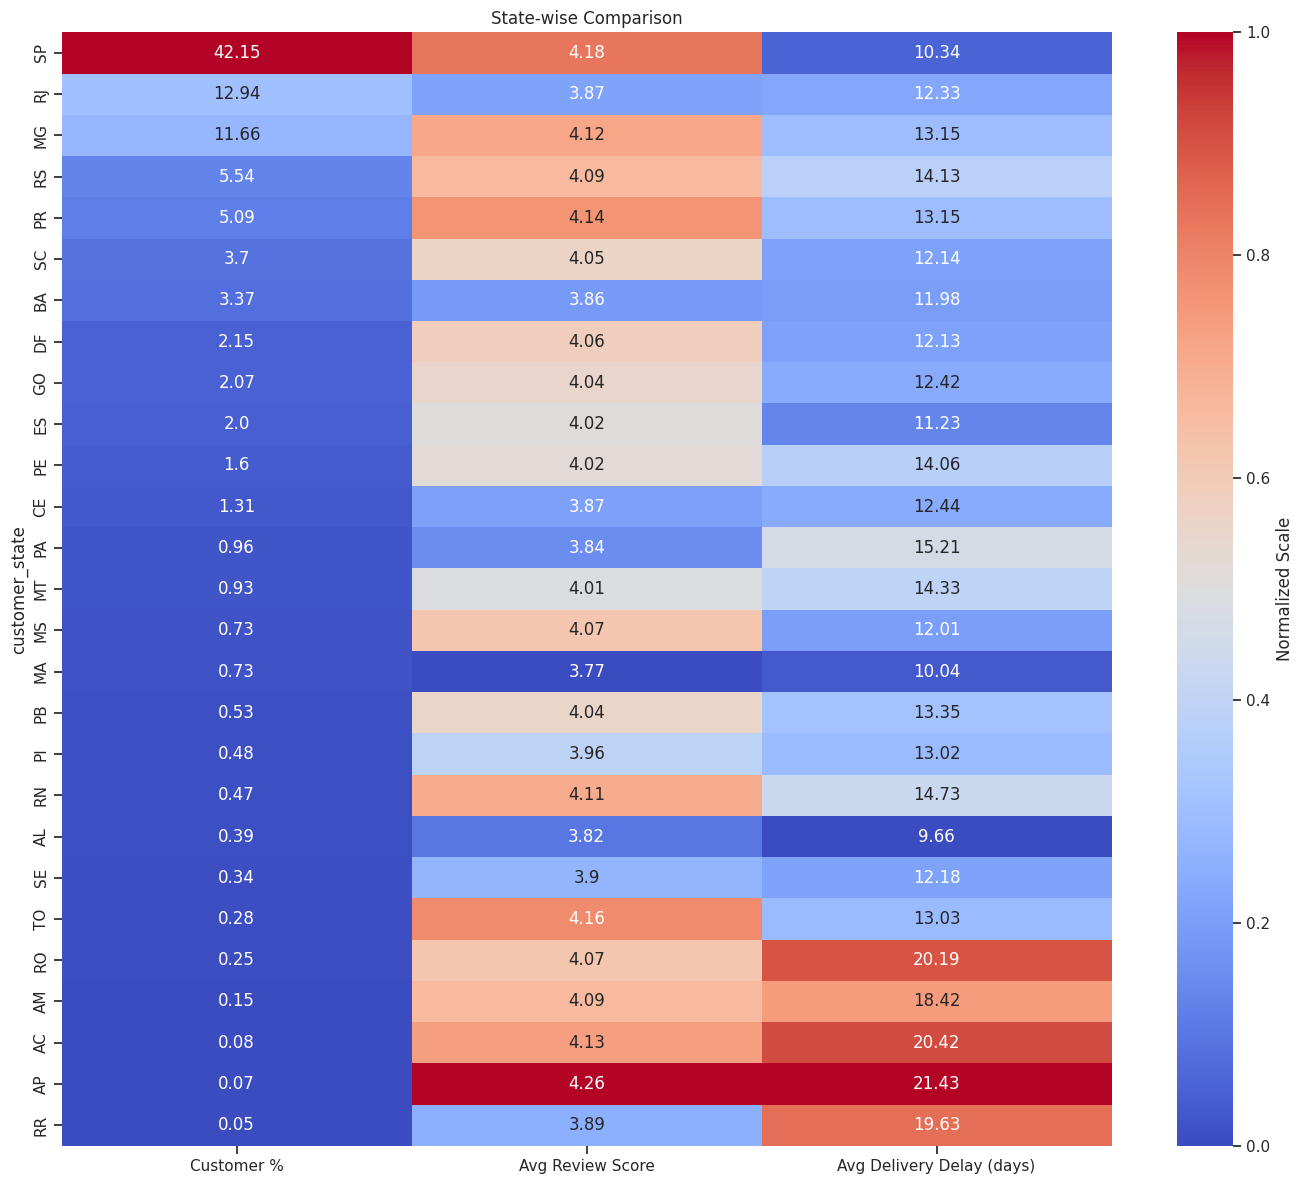

In [149]:
# Ensure values are aligned by index
states = customers_distribution.index
review = states_review_score.reindex(states)

# Convert timedelta to float (in days)
delay_days = states_delay.reindex(states).dt.total_seconds() / 86400

# Combine and convert to numeric (just in case)
states_df = pd.DataFrame({
    'Customer %': customers_distribution[states],
    'Avg Review Score': review,
    'Avg Delivery Delay (days)': delay_days
}).astype(float).dropna()

# Normalize numeric values for heatmap coloring
normalized_states_df = (states_df - states_df.min()) / (states_df.max() - states_df.min())

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(
    normalized_states_df,
    annot=states_df.round(2),
    fmt='',
    cmap='coolwarm',
    cbar_kws={'label': 'Normalized Scale'}
)
plt.title('State-wise Comparison')
plt.tight_layout()
plt.show()

*Potential Insight*

Customer Satisfaction: States with higher review scores might indicate higher customer satisfaction. 

Delivery Efficiency: States with lower delivery delays might have more efficient logistics or better infrastructure. 

Market Focus: States with higher customer percentages might be key markets.

**- There is no clear relation between the review score and the delivery delay.**

**- There is an obvious problem with the order_estimated_delivery_date calculation that does not reflect the reality at all.**

## Generated EDA visualization

In [18]:
AV = AutoViz_Class()

In [19]:
report = AV.AutoViz(data)

Shape of your Data Set loaded: (114092, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
order_reception_delay of type=timedelta64[ns] is not classified
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  3
    Number of Date Time Columns =  3
    Number of ID Columns =  0
    Number of Columns to Delete =  0
No of columns classified 19 does not match 20 total cols. Continuing...
 Missing columns = ['order_reception_delay']
        No variables removed s

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
order_id,object,0.000000,87,,,No issue
order_status,object,0.000000,0,,,"6 rare categories: ['canceled', 'unavailable', 'invoiced', 'processing', 'created', 'approved']. Group them into a single category or drop the categories."
order_purchase_timestamp,datetime64[ns],0.000000,86,,,Possible date-time colum: transform before modeling step.
order_delivered_customer_date,datetime64[ns],2.851208,83,,,"Possible date-time colum: transform before modeling step., 3253 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types:"
order_estimated_delivery_date,datetime64[ns],0.000000,0,,,Possible date-time colum: transform before modeling step.
customer_unique_id,object,0.000000,84,,,No issue
customer_zip_code_prefix,int64,0.000000,13,1003.000000,99990.000000,No issue
customer_city,object,0.000000,3,,,No issue
customer_state,object,0.000000,0,,,15 rare categories: Too many to list. Group them into a single category or drop the categories.
order_item_id,float64,0.681906,NA,1.000000,21.000000,"778 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 14100 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them."


Number of All Scatter Plots = 10


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/romaric/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/romaric/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/romaric/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/romaric/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/romaric/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/romaric/nltk_data...
[nltk_data]    |   Package movie_reviews is already

Could not draw wordcloud plot for customer_city. Only supported for TrueType fonts
Could not draw wordcloud plot for product_id. Only supported for TrueType fonts
Could not draw wordcloud plot for seller_id. Only supported for TrueType fonts
Could not draw wordcloud plot for review_creation_date. Only supported for TrueType fonts
All Plots done
Time to run AutoViz = 116 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [20]:
basic_eda_report = sv.analyze(data)

                                             |                                              | [  0%]   00:00 -…

In [21]:
basic_eda_report.show_html("basic_eda_report.html")

Report basic_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


order_status
delivered      97.129500
shipped         1.054195
canceled        0.629496
unavailable     0.547242
invoiced        0.317266
processing      0.315587
created         0.004197
approved        0.002518
Name: proportion, dtype: float64